In [7]:
# Урок 3. Знакомство с данными
import pandas as pd
covid_data=pd.read_csv('data/covid_data.csv', sep=',')
vaccinations_data=pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

# сет covid_data:
# date — дата наблюдения;
# province/state — наименование провинции/штата;
# country — наименование страны;
# confirmed — общее число зафиксированных случаев на указанный день;
# deaths — общее число зафиксированных смертей на указанный день;
# recovered — общее число выздоровлений на указанный день.

# сет vaccinations_data
# country — наименование страны;
# date — дата наблюдения;
# total_vaccinations — общее число введённых вакцин в стране на указанный день;
# people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
# people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
# people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
# people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
# daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
# vaccines — комбинации вакцин, используемые в стране.

# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. 
# Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

# Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Создадим признак больных на данный момент (active). 
# Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. 
# Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам
# и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

# В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# Задание 1.
# За какой период представлены данные в таблице covid_data? 
# В качестве ответа введите даты в формате datetime (без указания времени).
start=covid_data['date'].min()
end=covid_data['date'].max()
print(start,'-',end)
# решение print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

# Задание 2.
# За какой период представлены данные в таблице vaccinations_data? 
# В качестве ответа введите даты в формате datetime без указания времени.
start_vac=vaccinations_data['date'].min()
end_vac=vaccinations_data['date'].max()
print(start_vac, '-', end_vac)
# решение аналогично как в первом задании

# Задание 3. 
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country. 
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, 
# вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и 
# из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.
# Сохраните таблицу covid_df — она понадобится нам в следующем юните. 
# Сколько строк и столбцов в таблице covid_df?
covid_df=covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
print("строк: ", covid_df.shape[0])
print("столбцов: ", covid_df.shape[1])
covid_df.to_csv('data/covid_df.csv', index=False)

2020-01-22 00:00:00 - 2021-05-29 00:00:00
2020-12-02 00:00:00 - 2021-09-06 00:00:00
строк:  86785
столбцов:  16


<Axes: xlabel='country'>

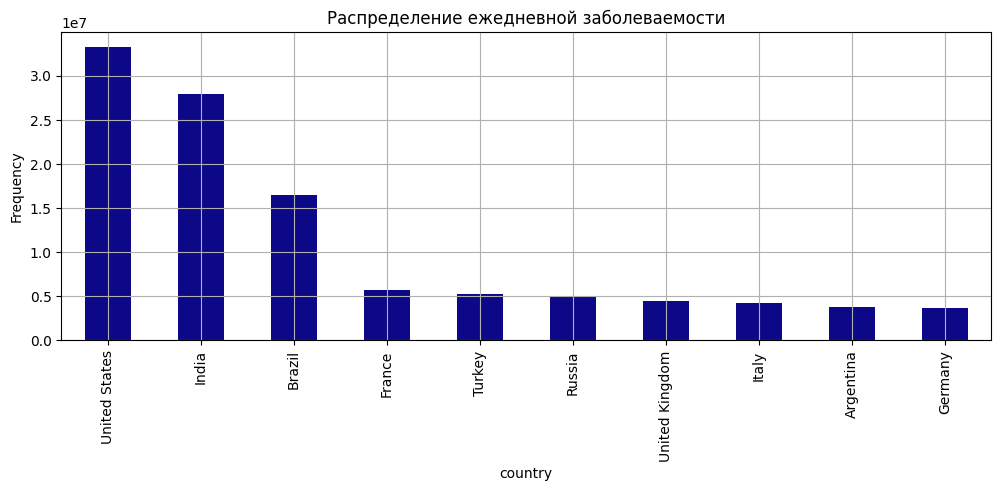

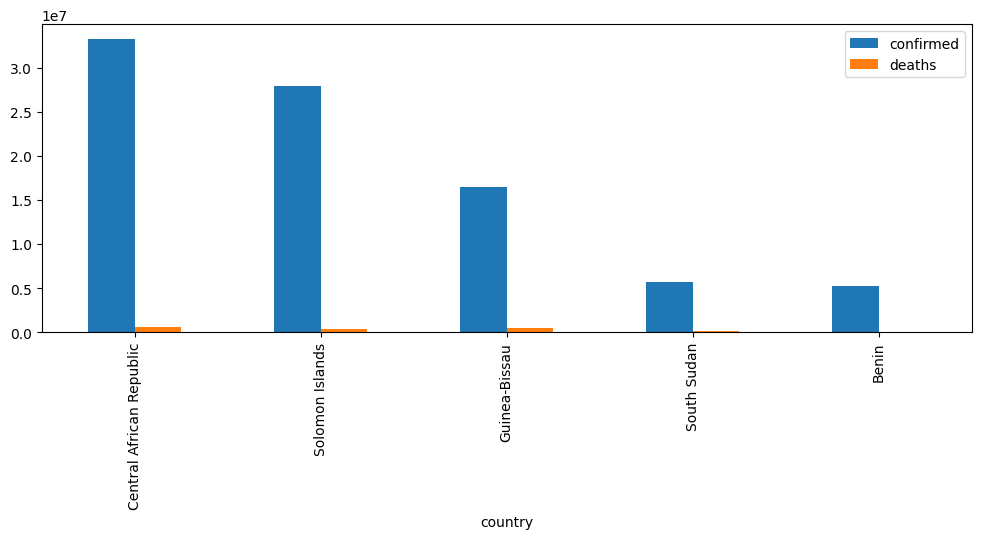

In [2]:
# Задание 4. 
# В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — 
# общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. 
# Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к 
# числу зафиксированных случаев (confirmed) и умножьте результаты на 100%. Какова максимальная летальность в 
# США (United States) за весь период? Ответ округлите до второго знака после запятой.
covid_df['recover_rate']=covid_df['recovered']/covid_df['confirmed']*100
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100
round(covid_df[covid_df['country']=='United States']['death_rate'].max(), 2)

# Задание 5. 
# Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
round(covid_df[covid_df['country']=='Russia']['recover_rate'].mean(), 2)

# УРОК 4. Базовая визуализация в Pandas
# установил библиотеку через !pip install matplotlib
# Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное 
# число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем 
# суммарное число зафиксированных случаев по дням. 
# Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 
# Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.
grouped_cases_line=covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases_line.plot(
    kind='line',
    figsize=(10,4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3
); # стоит ставить для избегания вывода служебной информации

# Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. 
# Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в 
# гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).
grouped_cases_hist=covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases_hist.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10
); 

# Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости. 
# Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью 
# агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.
# Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. 
# Параметр colormap отвечает за цветовую гамму графика.
grouped_country=covid_df.groupby(['country'])['confirmed'].last()
grouped_country=grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4),
    colormap='plasma'
); 

# А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. 
# Для этого отобразим сразу два показателя на столбчатой диаграмме: 
grouped_country=covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country=grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12,4)
); 

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')